<a href="https://colab.research.google.com/github/syahvan/Image-Clustering/blob/main/Image_Clustering_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Image clustering*** merupakan salah satu teknik unsupervised learning yang bertujuan untuk mengelompokkan gambar ke dalam beberapa cluster berdasarkan kesamaan visual atau fitur lainnya. Cluster adalah sekelompok atau sekumpulan objek-objek data yang similar satu sama lain dalam cluster yang sama dan disimilar terhadap objek-objek yang berbeda cluster. Kesamaan objek biasanya diperoleh dari nilai-nilai atribut yang menjelaskan objek data, sedangkan objek-objek data biasanya direpresentasikan sebagai sebuah titik dalam ruang multidimensi.

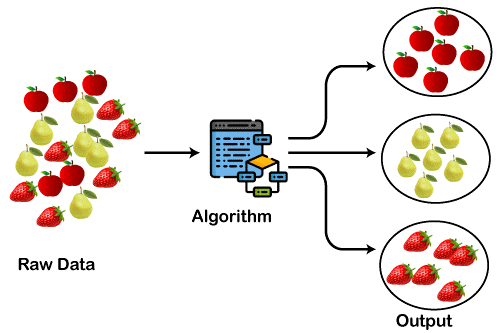



# 1. Image Preprocessing

In [1]:
#Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import cv2
import os, glob, shutil
from sklearn.decomposition import PCA
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Mounted dataset dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Path dataset
input_dir = '/content/drive/MyDrive/Dataset/image-dataset/*.jpeg'

In [4]:
#Image Preprocessing
images = [cv2.resize(cv2.imread(file), (224, 224)) for file in glob.glob(input_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)
images.shape

(1328, 150528)

In [5]:
len(images) #Jumlah gambar

1328

# 2. Feature Extraction

## 2.1 Transfer Learning MobileNetV2

In [6]:
#Feature extraction dengan transfer learning MobileNetV2
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

42/42 [==============================] - 11s 42ms/step


In [7]:
pred_images.shape

(1328, 62720)

# 3. Model clustering dengan Algoritma K-Means

## 3.1 Metode Elbow

In [10]:
#Menentukan nilai K dengan Elbow Method
st = time.time()
kmax = 10
inertia = []
kl = []
for k in range(2, kmax+1):
    kmeans1 = KMeans(n_clusters=k).fit(pred_images)
    inertia.append(kmeans1.inertia_)
    kl.append(k)

et = time.time()
elapsed_time = et - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 00:08:00


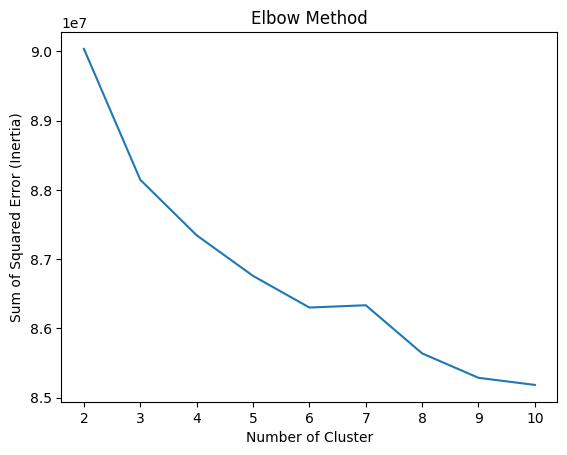

In [11]:
plt.plot(kl, inertia)
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')
plt.show()

In [12]:
df4 = pd.DataFrame(
    {'K': kl,
     'Sum of Squared Error': inertia
    })
df4

,K,Sum of Squared Error
0,2,90034008.0
1,3,88144184.0
2,4,87343128.0
3,5,86756944.0
4,6,86300016.0
5,7,86333120.0
6,8,85637880.0
7,9,85285344.0
8,10,85182720.0


### 3.2 Metode Silhouette

In [15]:
#Menentukan nilai K dengan Silhouette Method
st = time.time()
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
  kmeans2 = KMeans(n_clusters = k).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
  kl.append(k)

et = time.time()
elapsed_time = et - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 00:08:46


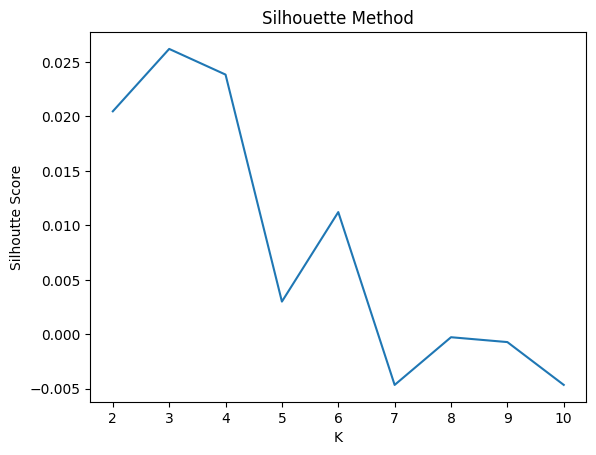

In [16]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.xlabel('K')
plt.title('Silhouette Method')
plt.show()

In [17]:
df3 = pd.DataFrame(
    {'K': kl,
     'Silhoutte Score': sil
    })
df3

,K,Silhoutte Score
0,2,0.020474
1,3,0.026205
2,4,0.023846
3,5,0.002999
4,6,0.011220
5,7,-0.004654
6,8,-0.000274
7,9,-0.000720
8,10,-0.004651


Pada Elbow Method, bentuk siku terlihat pada saat k = 3. Pada Silhouette Method, nilai puncak juga terlihat pada saat k = 3. Oleh karena itu, data akan dibagi menjadi 3 cluster

# 4. Membagi Data ke dalam Folder Cluster

In [21]:
#Membagi data menjadi 3 cluster dalam folder yang berbeda
k = 3
kmodel = KMeans(n_clusters=k, random_state=42)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)

paths = [file for file in glob.glob(input_dir)]
for i in range(k):
	os.makedirs("/content/drive/MyDrive/Dataset/Output-Cluster/Cluster-" + str(i))
for i in range(len(paths)):
	shutil.copy2(paths[i], "/content/drive/MyDrive/Dataset/Output-Cluster/Cluster-"+str(kpredictions[i]))


Jika dilihat hasilnya dalam ketiga folder cluster, isi gambar pada tiap cluster:
1.   Cluster-0 = Pegunungan
2.   Cluster-1 = Pantai
3.   Cluster-2 = Hutan atau Pepohonan




